<a href="https://colab.research.google.com/github/isabelontheway/2048/blob/master/lifesat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [0]:
# Prepare data, joins two tables
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [0]:
# Load the data
data_path = "https://github.com/ageron/handson-ml/raw/master/datasets/lifesat/"
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv", thousands=',',
							 delimiter='\t', encoding='latin1', na_values="n/a")
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [0]:
# Select the linear model
model = sklearn.linear_model.LinearRegression()

# Select and transpose GDP and Lifesat columns
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Train the model
model.fit(x, y)

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1320: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


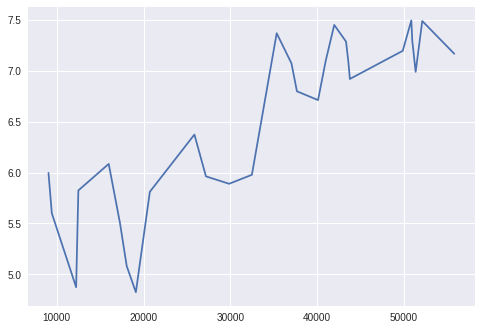

In [28]:
# Use a overfit polynimial model
from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(x, y)


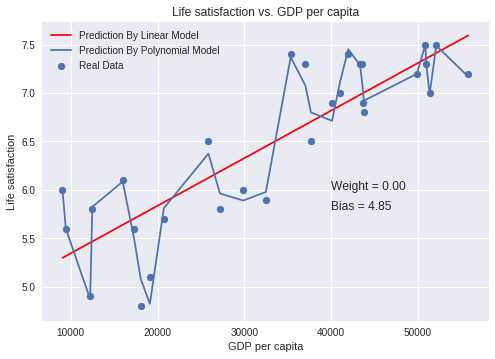

In [29]:
plt.scatter(x=country_stats["GDP per capita"], y=country_stats["Life satisfaction"], label="Real Data")
plt.title("Life satisfaction vs. GDP per capita")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.plot(x, model.predict(x), 'r-', label='Prediction By Linear Model')
plt.plot(x, pipeline_reg.predict(x), label='Prediction By Polynomial Model')
weight = model.coef_[0]
bias = model.intercept_[0]
plt.text(40000, 6.0, "Weight = %0.2f" % weight)
plt.text(40000, 5.8, "Bias = %0.2f" % bias)
plt.legend()
plt.show()